# Customer Analysis Final Round

Data Description

La data pertenece a inforamcion de marketing sobre clientes de una aseguradora de autos. La informacion esta resumida a las necesidades de una empresa de seguros: La primas que cobran, la cantidad de reclamos, el tipo de cobertura, entre otras. Ademas hay informacion dscriptiva del cliente que nos dice quien es el cliente y cual es el tipo de auto que se esta asegurando   

## Significado de las columnas mas importantes  

'Customer' = Numero de cleinte.

'ST' = Estado del cliente.

'Response' = No esta bien definido puede ser si respondio una algunas pregunta o encuesta o si el cliente completo su aplicacion y ha reclamado su seguro

'GENDER' = Genero del cliente. (M o F)

'Education' = Nivel de Educacion del cleinte.

'Effective To Date'	 = Momento en que el cliente aplico para el seguro.

'EmploymentStatus' = El estado laboral en que se encuentra el cliente.

'Location Code' = Categorias segun el lugar donde vive basado en la dnsidad de poblacion de su localidad.	

'Marital Status	' = Estado civil.

'Monthly Premium Auto' = El costo de la prima mensual del auto del cliente

'Months Since Last Claim' = Meses desde la ultima queja del seguro 

'Months Since Policy Inception' = Meses desde la ultima vez que la poliza de seguros entro en efecto

'Number of Open Complaints' = Numero de quejas sin resolver del cliente

'Number of Policies	' = Numero de polizas de seguro que tiene el cliente.

'Customer Lifetime Value' = desde que adquieres un cliente, estimacion del ingreso del cliente durante un peridodo de tiempo.

'Income' = Ganancias del cliente.

'Monthly Premium Auto' = Prima mensual del auto.

'Number of Open Complaints' = Numero de quejas.

'Policy Type' = tipo de polizas.

'Vehicle Class' = la clasificacion del vehiculo.

'Total Claim Amount' = Lo que se paga del seguro cuando se reclama


# Goal 
El objetivo del analisis es buscar crear un modelo de regression lineal 
que describa el comportamiento del Total Claim Amount de tal manera que podamos pronosticar 
con un grado alto de certeza el Total Claim Amount de un cliente con ciertas caracteristicas.

In [2]:
import pandas as pd 
import numpy as np
from scipy import stats
import statistics as stat
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from scipy.spatial import transform
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

 02 - Getting Data

In [70]:
data=pd.read_csv('marketing_customer_analysis.csv')
data.head().T

,0,1,2,3,4
Customer,BU79786,QZ44356,AI49188,WW63253,HB64268
State,Washington,Arizona,Nevada,California,Washington
Customer Lifetime Value,2763.519279,6979.535903,12887.43165,7645.861827,2813.692575
Response,No,No,No,No,No
Coverage,Basic,Extended,Premium,Basic,Basic
Education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
Effective To Date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11
EmploymentStatus,Employed,Unemployed,Employed,Unemployed,Employed
Gender,F,F,F,M,M
Income,56274,0,48767,0,43836


03 - Cleaning/Wrangling/EDA

In [71]:
# Cambiar el nombre de las columnas

#Primero nomalzamos las mayusculas y los espacios

def clean_headers(x):
  for i in x.columns:
   x.columns = [i.lower().replace(' ','_')  for i in x.columns]
  return x

clean_headers(data)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
# Deal with NaN values.

data.isnull().sum()

#No se encuentran valores nulos 

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [72]:
#Categorical Features and numerical fetures
numerical = data.select_dtypes("number")
categorical = data.select_dtypes("object")

In [7]:
# Exploration

#Graficamos las distribuciones de los datos 

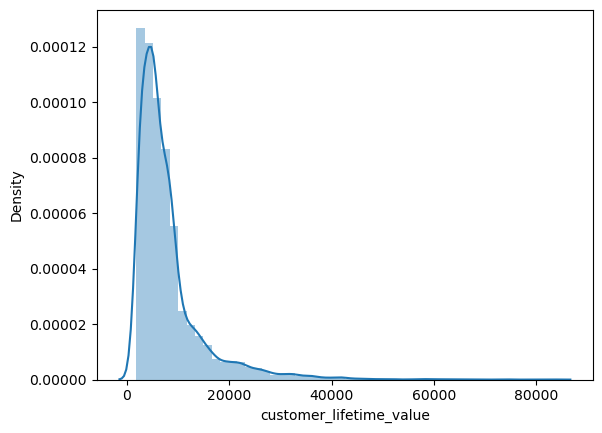

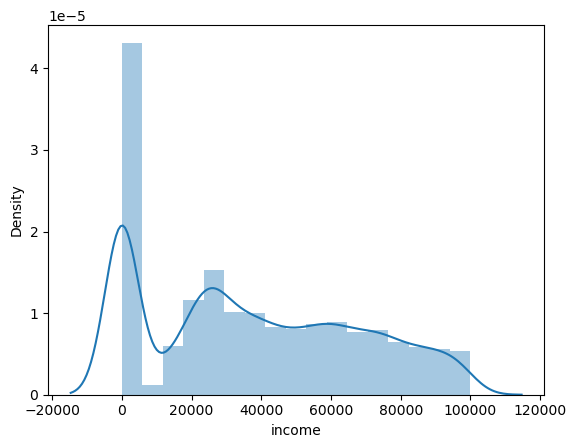

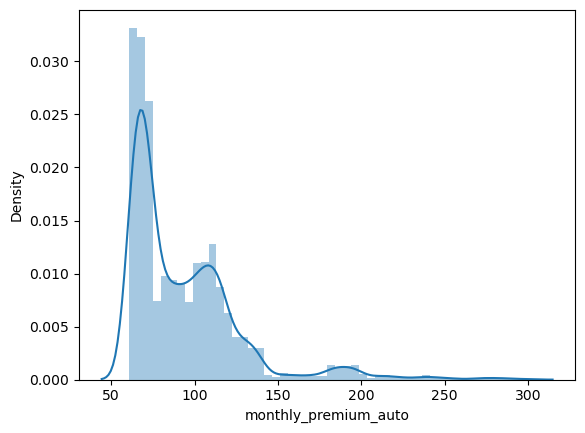

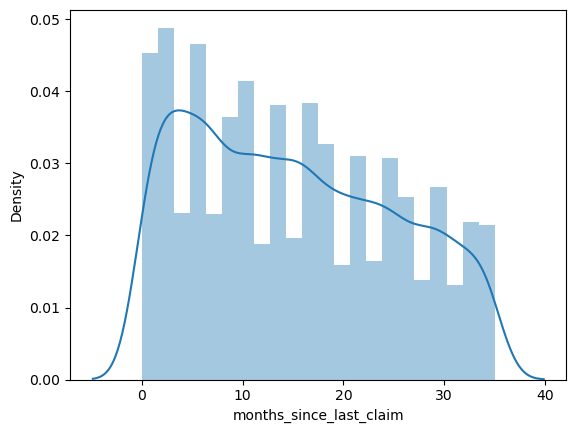

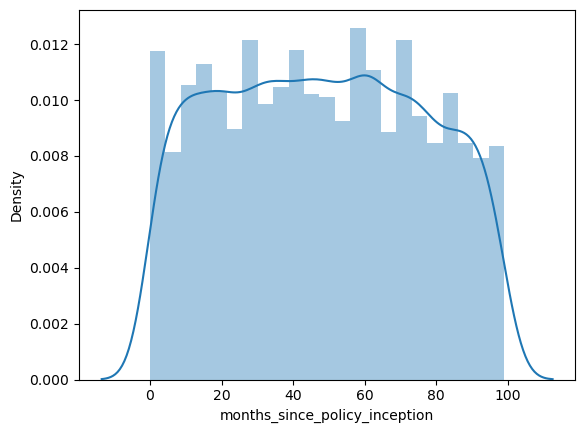

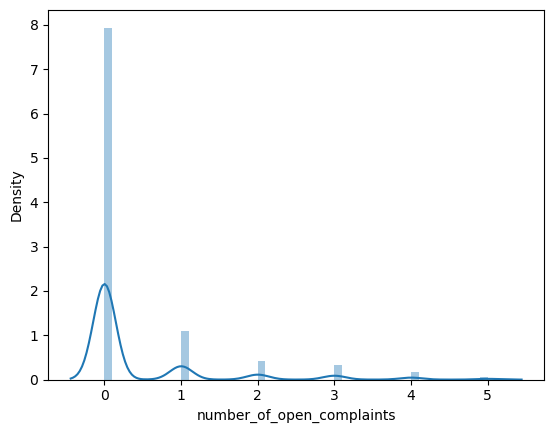

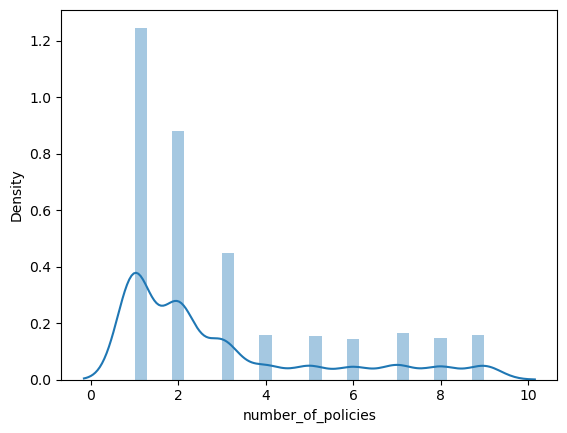

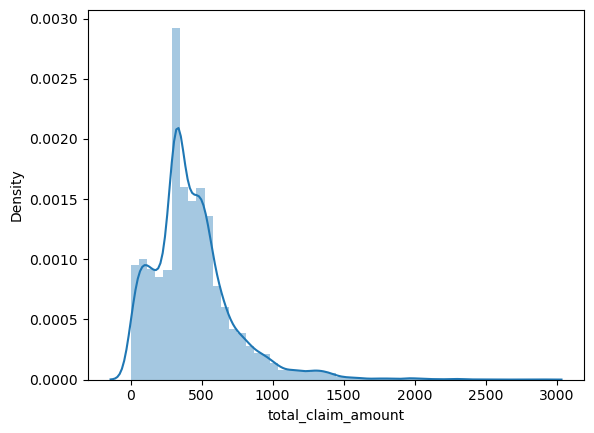

In [8]:
#Notamos que las distribuciones son continuas y discretas. Bbuscaremos normalizar las continuas
for i in range(len(numerical.columns)):
    sns.distplot( numerical.iloc[:,i])
    plt.show()

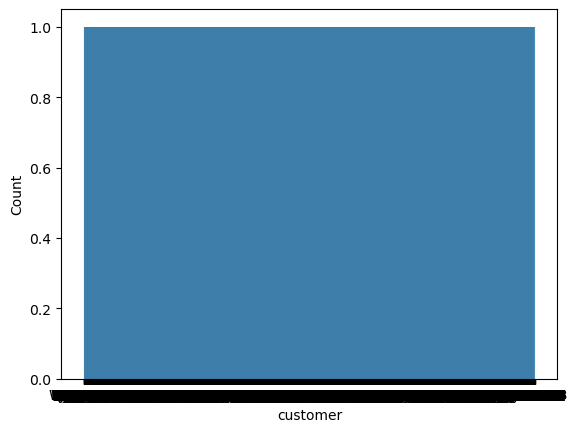

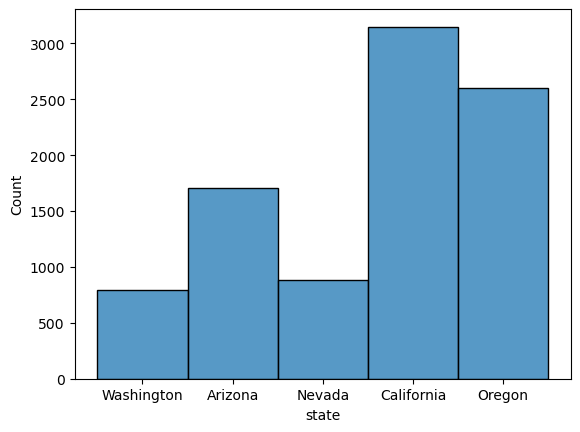

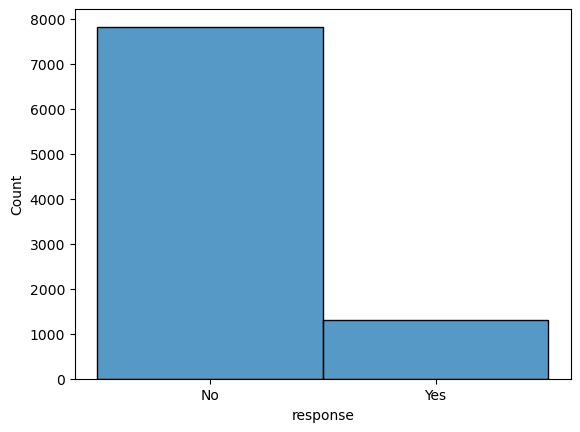

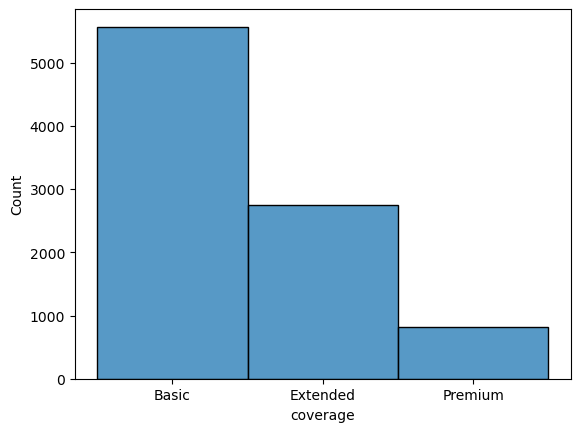

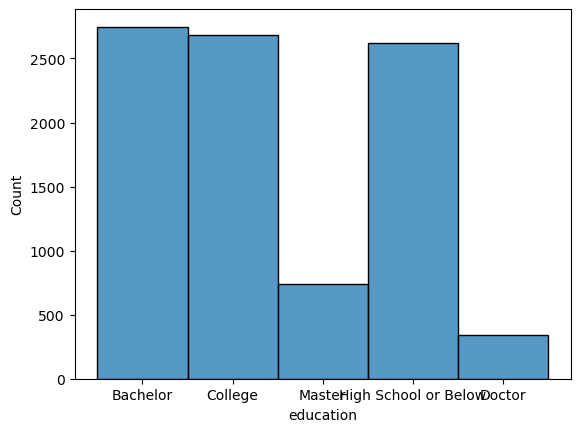

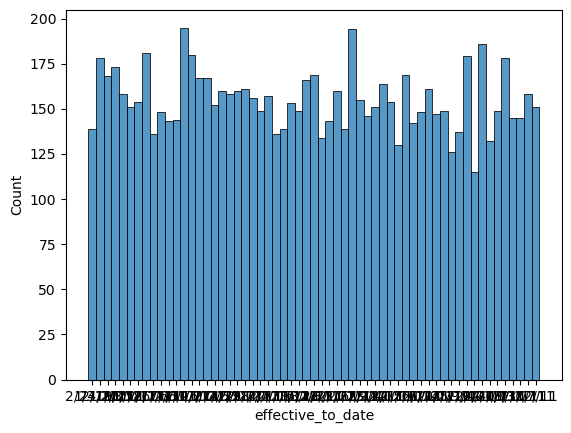

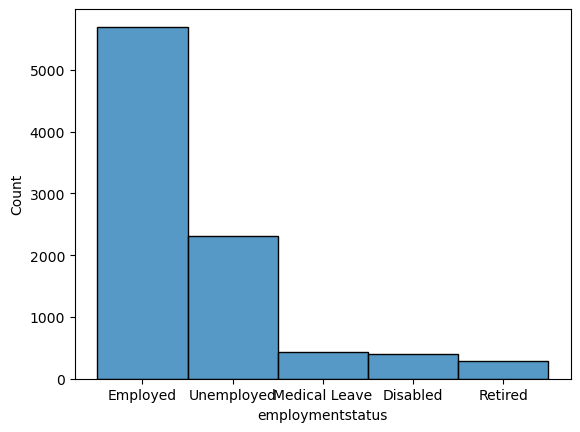

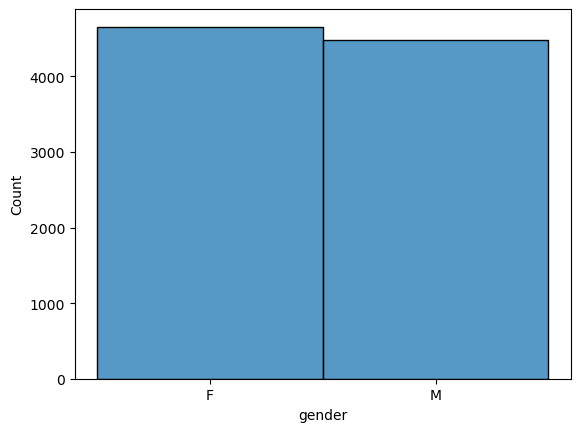

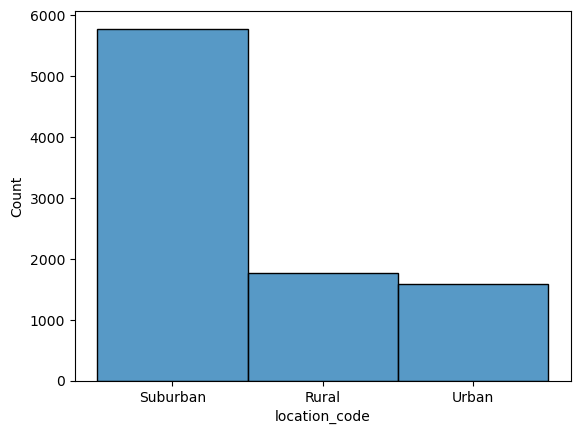

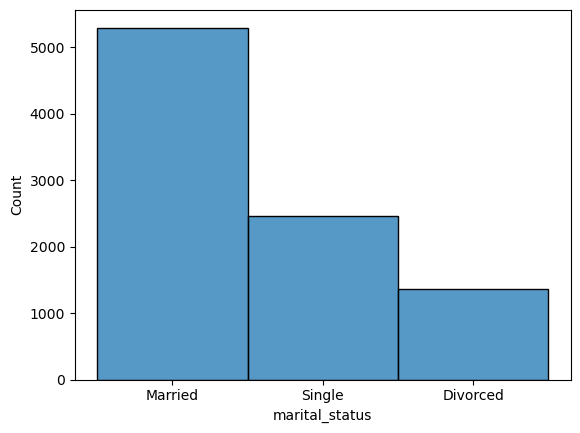

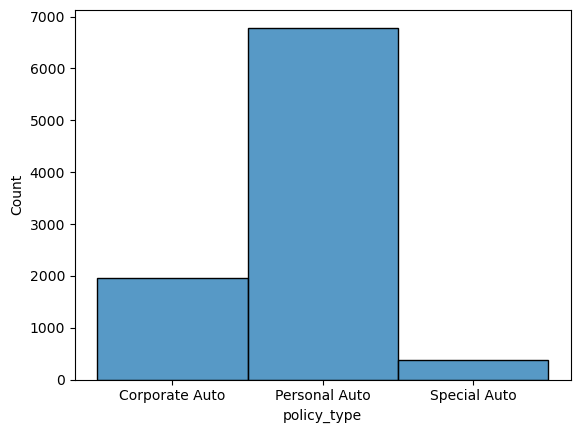

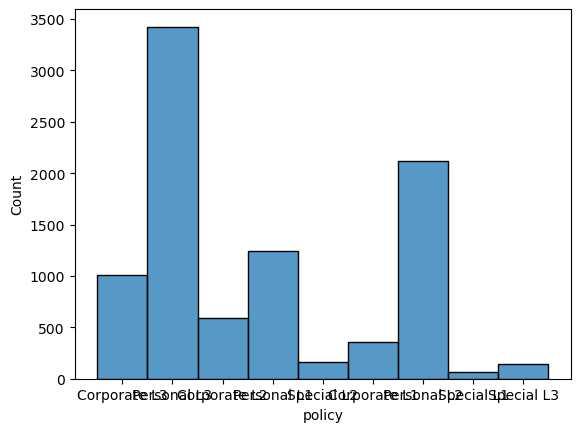

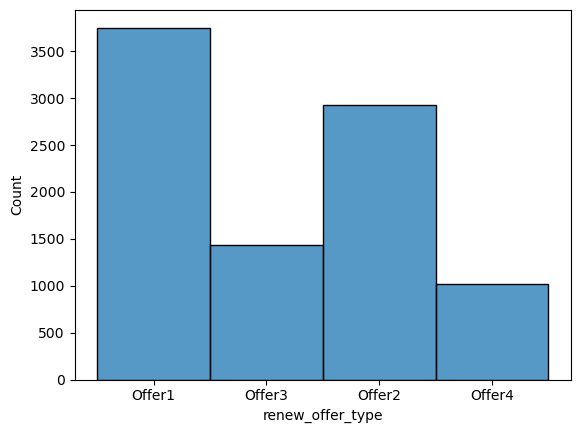

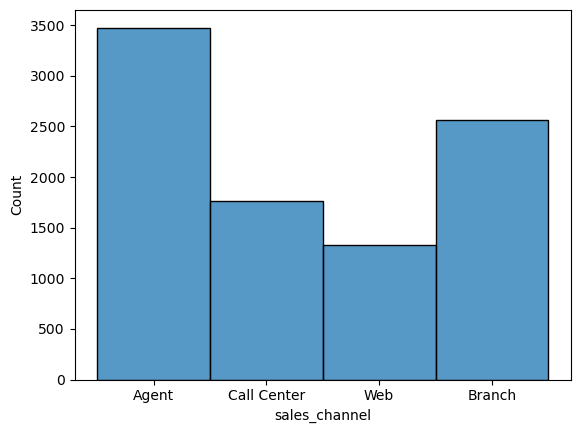

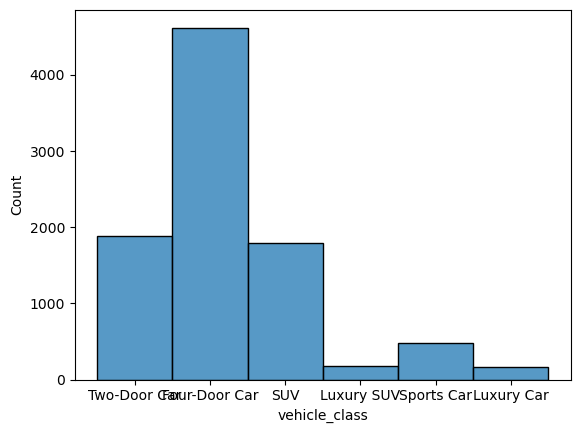

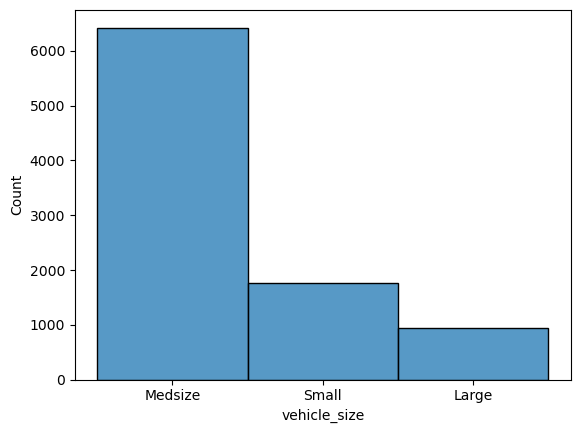

In [9]:
for i in range(len(categorical.columns)):
    sns.histplot( categorical.iloc[:,i])
    plt.show()


In [73]:
# para el modelo las columnas de fecha y Custumer nos genera ruido inecesario 
categorical.drop(['effective_to_date','customer'], axis=1)


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


04 - Processing Data

In [74]:
# Dealing with outliers. 
# Trabajaremos con  toda la data para que los ouliers que eliminemos coincidan con el tamaño de los 
# datos 
data.drop(['effective_to_date','customer'], axis=1)


,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


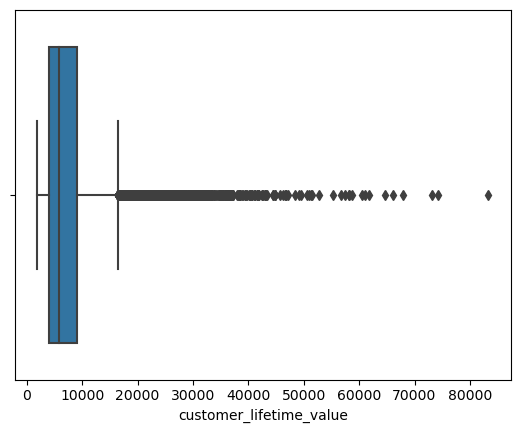

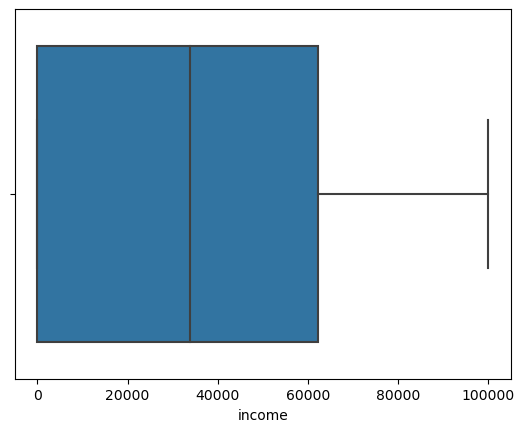

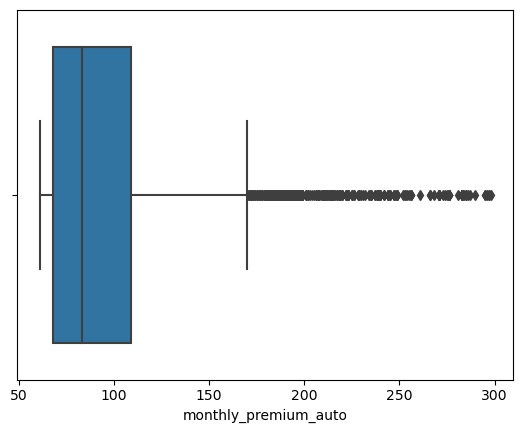

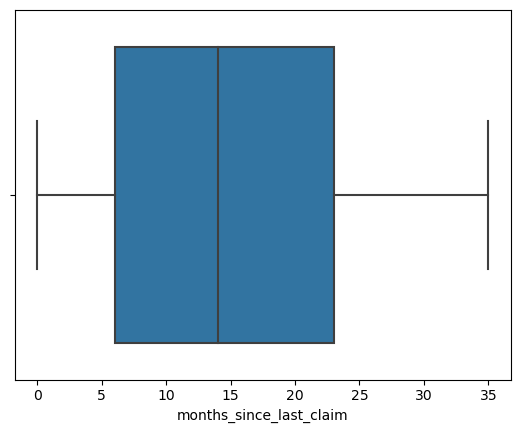

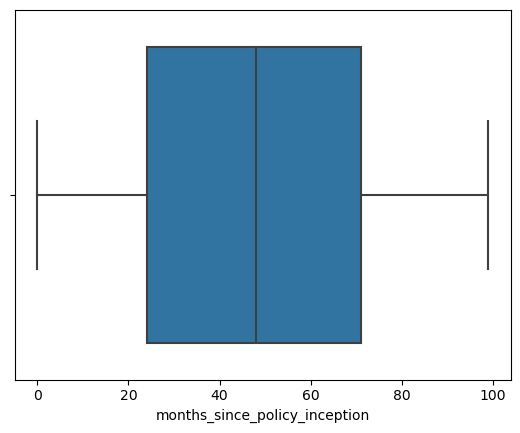

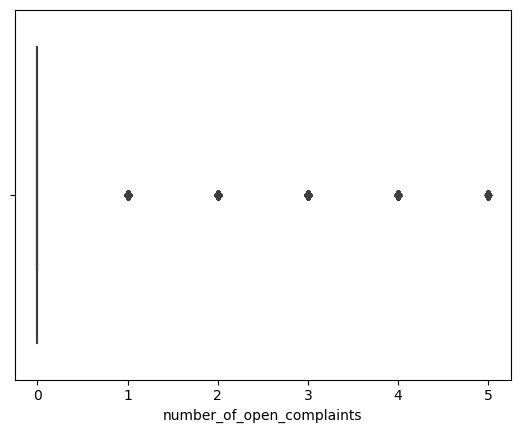

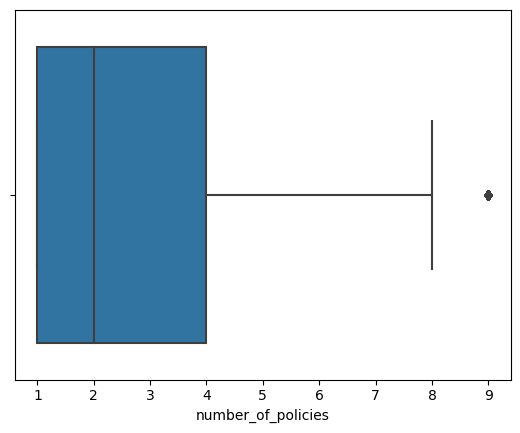

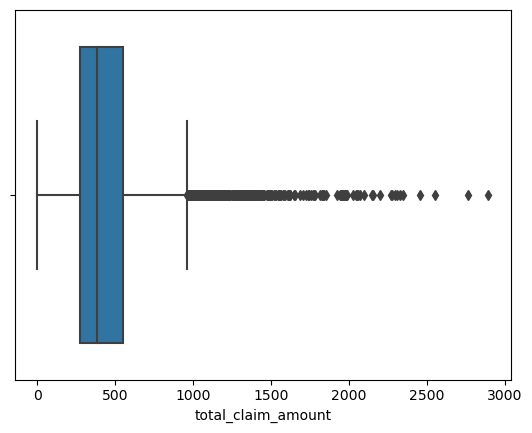

In [12]:
#Checar los ouliers

for i in range(len(numerical.columns)):
    sns.boxplot( numerical.iloc[:,i])
    plt.show()

15917.248387050002
-2960.8295515500013


<AxesSubplot:xlabel='customer_lifetime_value'>

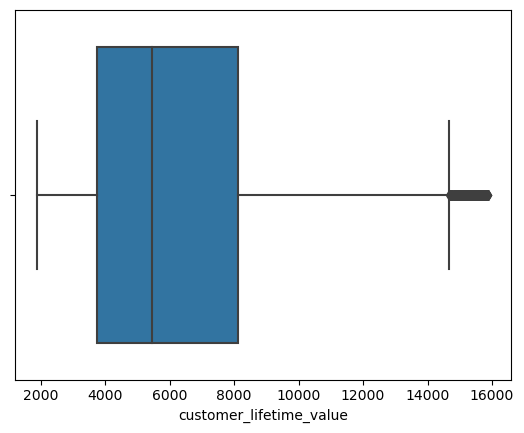

In [75]:
# IQR para limpiar outlers
#Customer life time 
iqr=np.percentile(data['customer_lifetime_value'],75)-np.percentile(data['customer_lifetime_value'],25)

upper_limit=np.percentile(data['customer_lifetime_value'],75)+1.4*iqr
lower_limit=np.percentile(data['customer_lifetime_value'],25)-1.4*iqr
print(upper_limit)
print(lower_limit)
data=data[(data['customer_lifetime_value']>lower_limit) & (data['customer_lifetime_value']<upper_limit)]
sns.boxplot(data['customer_lifetime_value'])



<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

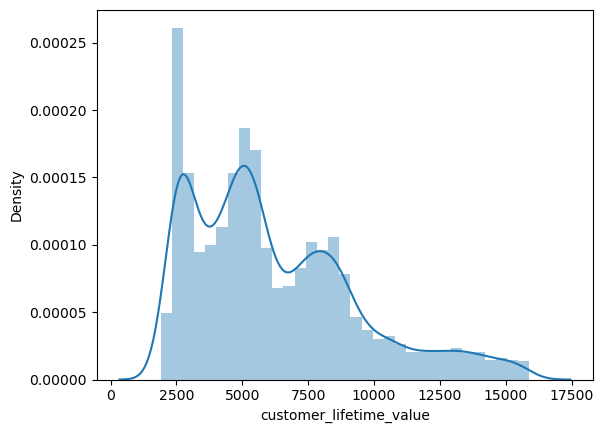

In [61]:
sns.distplot(data['customer_lifetime_value'])

920.9651348
-112.14930879999991


<AxesSubplot:xlabel='total_claim_amount'>

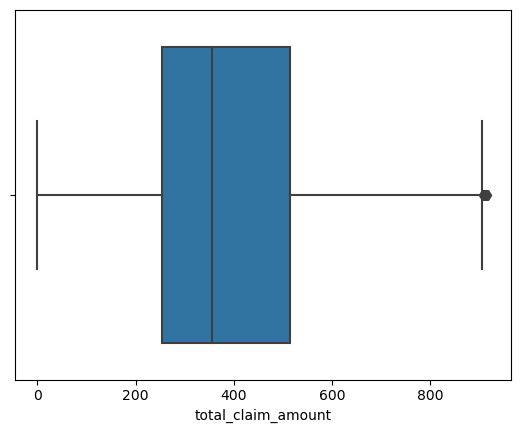

In [76]:
#total_claim_amount
iqr=np.percentile(data['total_claim_amount'],75)-np.percentile(data['total_claim_amount'],25)

upper_limit=np.percentile(data['total_claim_amount'],75)+1.4*iqr
lower_limit=np.percentile(data['total_claim_amount'],25)-1.4*iqr
print(upper_limit)
print(lower_limit)
data=data[(data['total_claim_amount']>lower_limit) & (data['total_claim_amount']<upper_limit)]
sns.boxplot(data['total_claim_amount'])


<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

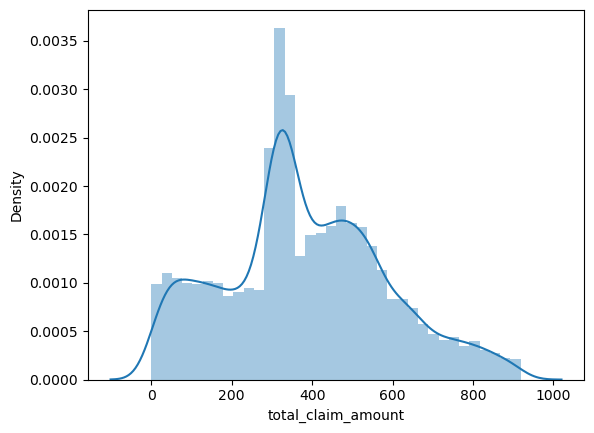

In [16]:
sns.distplot(data['total_claim_amount'])

158.0
14.0


<AxesSubplot:xlabel='monthly_premium_auto'>

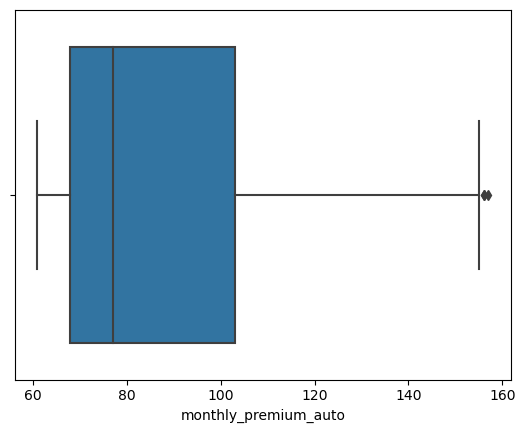

In [77]:
iqr=np.percentile(data['monthly_premium_auto'],75)-np.percentile(data['monthly_premium_auto'],25)

upper_limit=np.percentile(data['monthly_premium_auto'],75)+1.5*iqr
lower_limit=np.percentile(data['monthly_premium_auto'],25)-1.5*iqr
print(upper_limit)
print(lower_limit)
data=data[(data['monthly_premium_auto']>lower_limit) & (data['monthly_premium_auto']<upper_limit)]
sns.boxplot(data['monthly_premium_auto'])

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

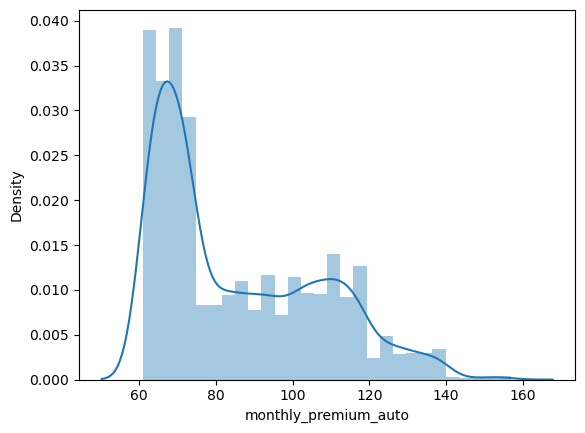

In [18]:
sns.distplot(data['monthly_premium_auto'])

In [78]:
# Vovlemos a llamar a las variables despues quitar los registros outliers
numerical = data.select_dtypes("number")
categorical = data.select_dtypes("object")


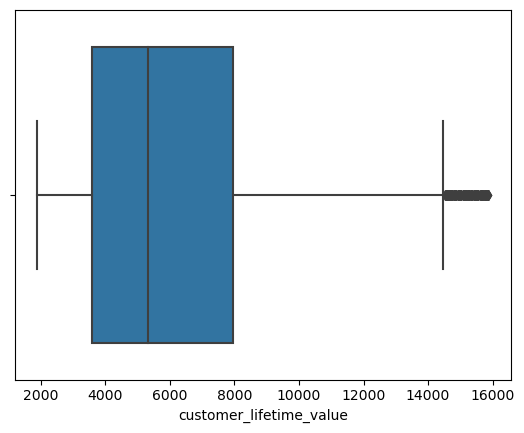

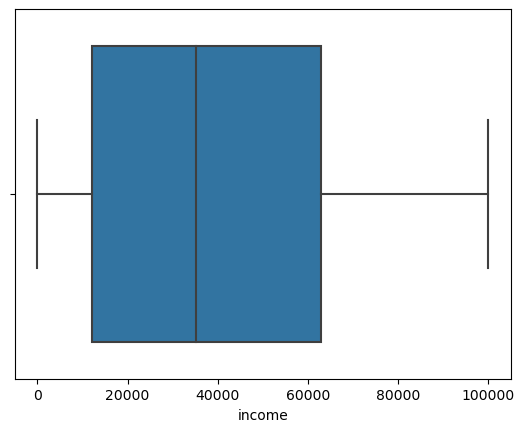

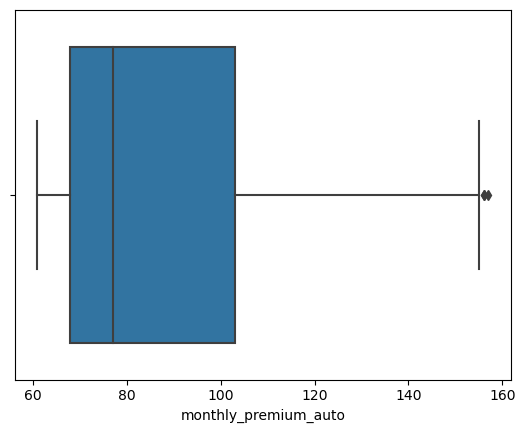

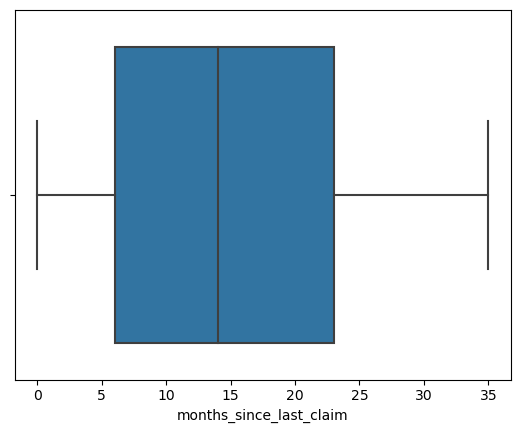

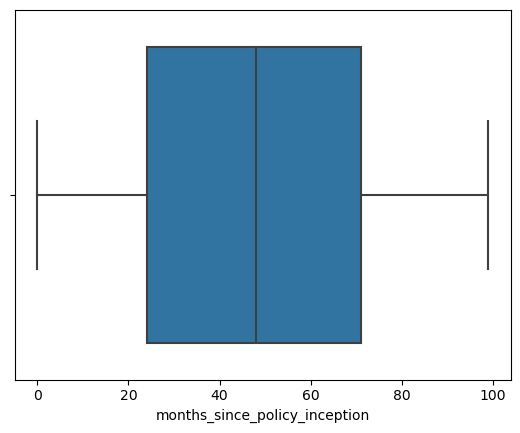

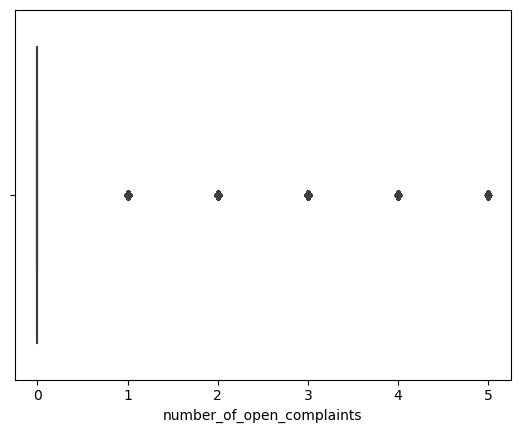

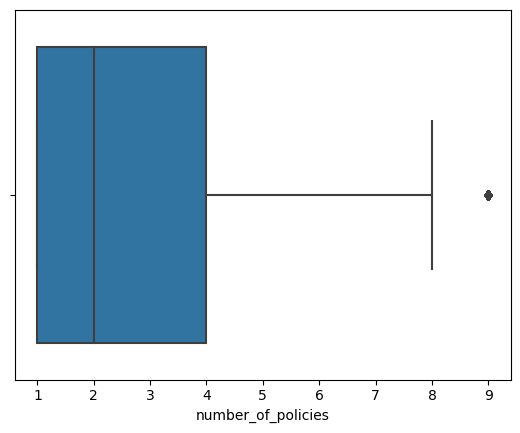

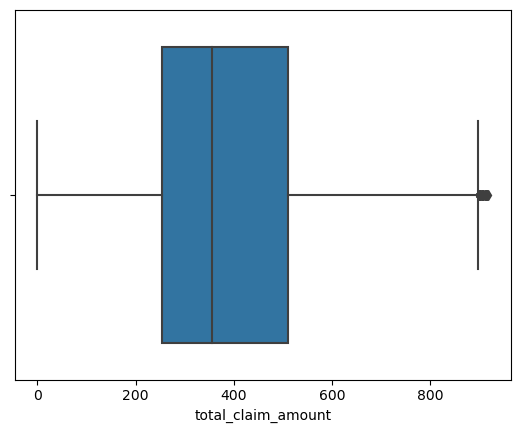

In [20]:
for i in range(len(numerical.columns)):
    sns.boxplot( numerical.iloc[:,i])
    plt.show()

In [97]:
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'],axis=1)
numerical = X.select_dtypes("number")
categorical = X.select_dtypes("object")


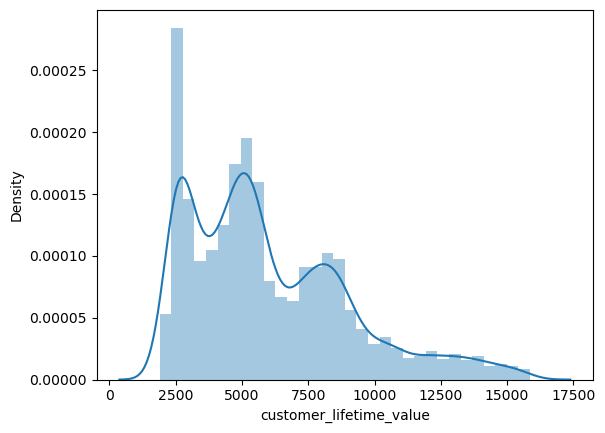

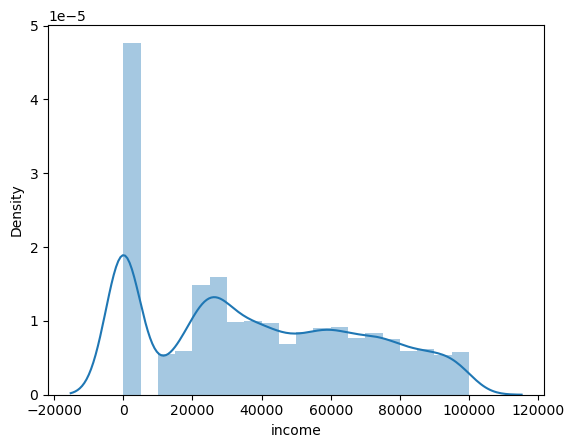

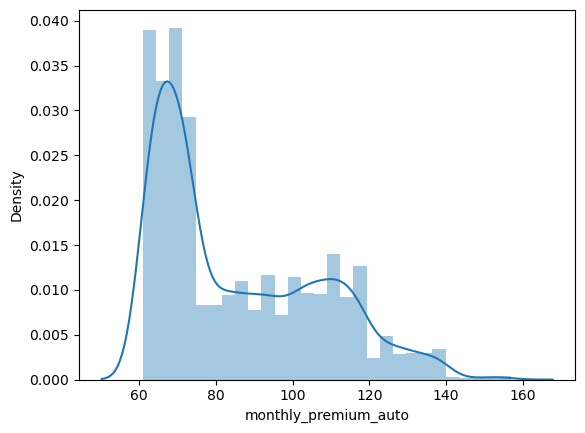

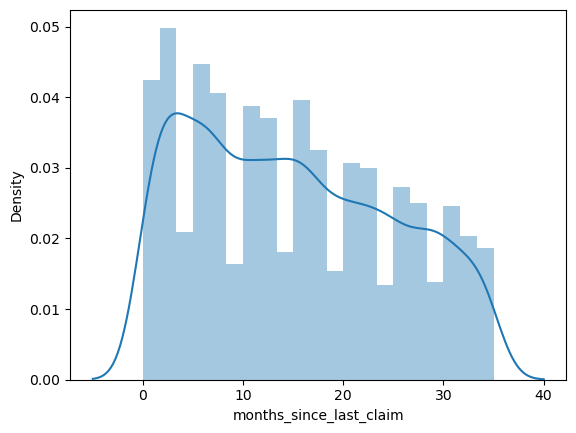

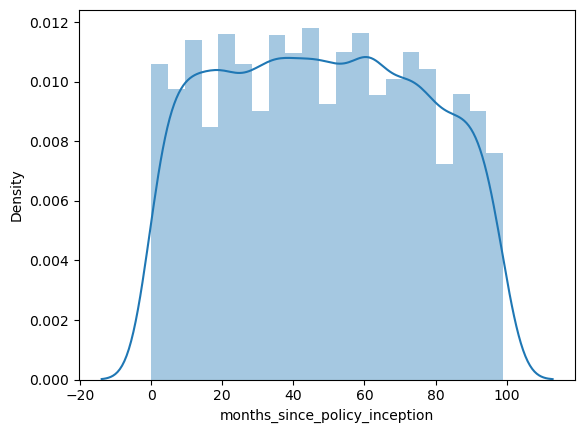

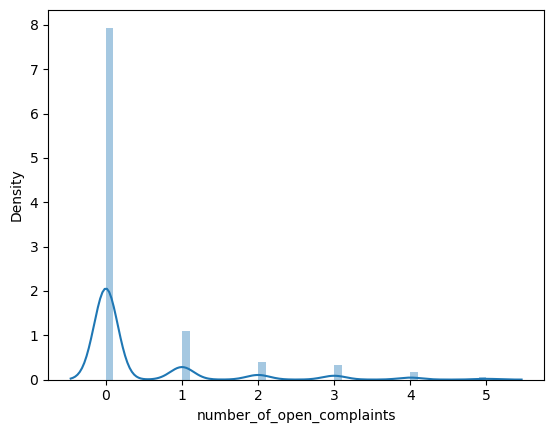

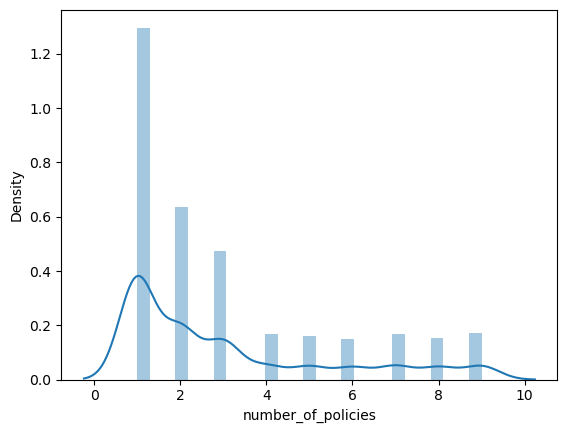

In [26]:
# Normalization.
for i in range(len(numerical.columns)):
    sns.distplot( numerical.iloc[:,i])
    plt.show()

In [98]:
# separamos lsa discretas 

continuas =numerical.iloc[:,0:5]
discretas =numerical.iloc[:,5:7]


In [99]:
#Standardize
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scales = scaler.fit(continuas)
continuas = scaler.transform(continuas)



In [87]:
continuas_df = pd.DataFrame(continuas)
continuas_df

,0,1,2,3,4
0,-1.073909,0.581254,-0.776798,1.696734,-1.542177
1,2.255619,0.333916,1.041953,0.299689,-0.358521
2,0.531784,-1.272844,0.948683,0.299689,0.609924
3,-1.057408,0.171451,-0.590259,-0.299044,-0.143311
4,0.732543,0.799631,-0.776798,-0.099466,1.650106
...,...,...,...,...,...
7732,-0.634240,0.300770,0.855414,0.100111,0.358846
7733,-0.964396,-0.561042,-0.310451,-0.099466,-0.717205
7734,0.702152,-1.272844,-0.030644,-0.598411,-0.394390
7735,0.491852,-0.549939,0.482337,1.896312,-1.613914


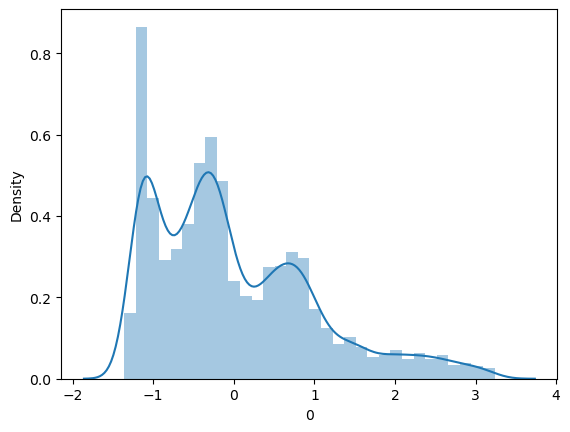

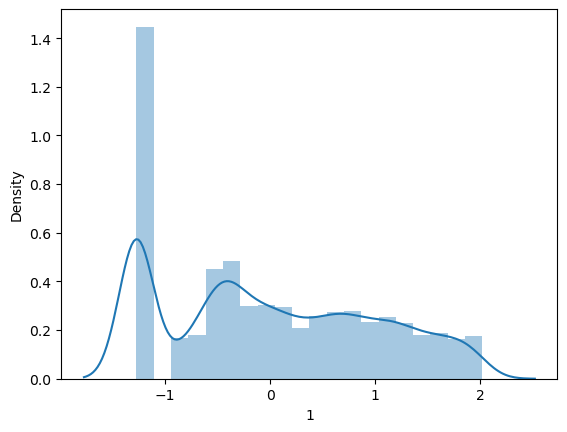

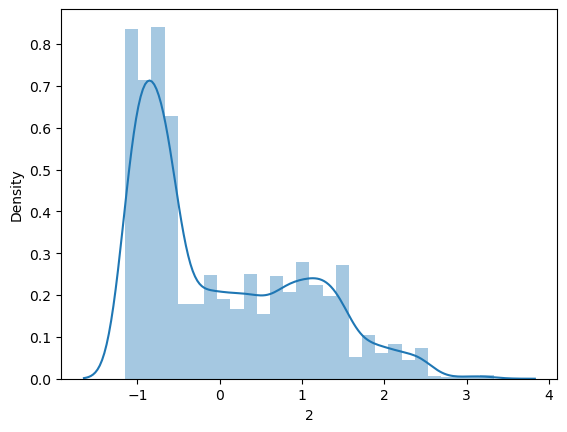

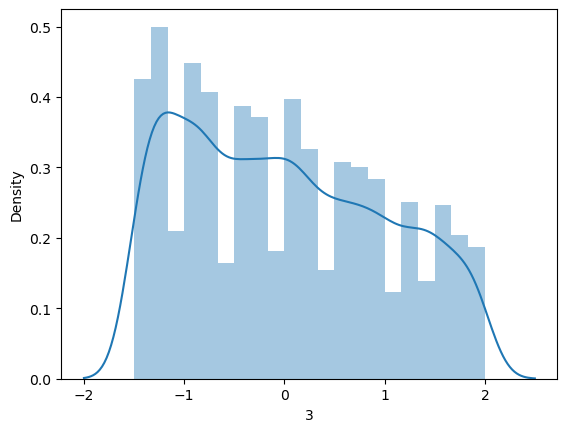

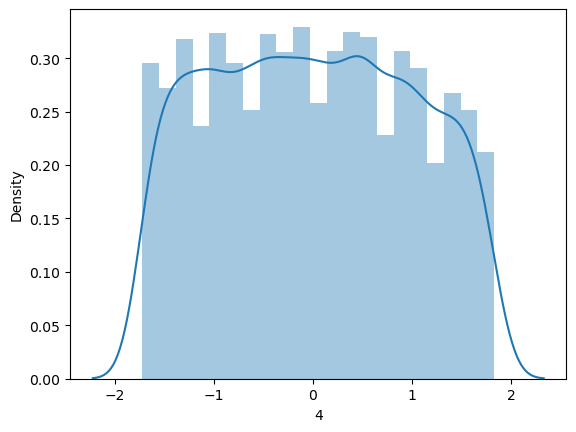

In [89]:
for i in range(len(continuas_df.columns)):
    sns.distplot( continuas_df.iloc[:,i])
    plt.show()

In [100]:
# Encoding Categorical Data.
categorical=categorical.drop(['customer','effective_to_date'], axis=1)
categorical = categorical.apply(preprocessing.LabelEncoder().fit_transform)
categorical 

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,4,0,0,0,1,0,1,1,0,2,0,0,3,1
2,2,0,2,0,1,0,1,1,1,5,0,0,3,1
3,1,0,0,0,4,1,1,1,0,1,0,2,1,1
4,4,0,0,0,1,1,0,2,1,3,0,0,0,1
5,3,1,0,0,1,0,0,1,1,5,1,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,1,0,2,1,1,0,1,2,1,4,0,1,0,0
9130,1,1,1,1,1,0,1,0,0,2,0,1,0,1
9131,1,0,1,0,4,1,1,2,0,1,0,1,0,1
9132,1,0,1,1,1,1,1,1,1,4,2,1,0,0


In [101]:
categorical.describe().T

,count,mean,std,min,25%,50%,75%,max
state,7737.0,1.738917,1.290958,0.0,1.0,1.0,3.0,4.0
response,7737.0,0.146568,0.353698,0.0,0.0,0.0,0.0,1.0
coverage,7737.0,0.434923,0.620601,0.0,0.0,0.0,1.0,2.0
education,7737.0,1.544139,1.378254,0.0,0.0,1.0,3.0,4.0
employmentstatus,7737.0,1.781311,1.324535,0.0,1.0,1.0,3.0,4.0
gender,7737.0,0.489208,0.499916,0.0,0.0,0.0,1.0,1.0
location_code,7737.0,0.979191,0.618741,0.0,1.0,1.0,1.0,2.0
marital_status,7737.0,1.105209,0.629789,0.0,1.0,1.0,2.0,2.0
policy_type,7737.0,0.822929,0.474725,0.0,1.0,1.0,1.0,2.0
policy,7737.0,3.787902,1.599870,0.0,3.0,4.0,5.0,8.0


In [102]:
print(categorical.shape)
print(discretas.shape)
print(continuas.shape)

(7737, 14)
(7737, 2)
(7737, 5)


In [103]:
X =  np.concatenate([categorical,discretas,continuas],axis=1)
X.shape

(7737, 21)

In [104]:
# Entrenamos nuestro modelo
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=5)

In [105]:
#Haciendo el modelo lineal, con una regresión
lm=linear_model.LinearRegression()

In [106]:
#Aquí ya ajustamos la maquinaria rpevia
model=lm.fit(X_train,y_train)

In [107]:
# probamos las predicciones
predictions=lm.predict(X_train)
predictions[:10]

array([264.66685613, 266.09178056, 305.26149421, 538.61119578,
       439.99879015, 242.43353514, 591.39649114, 604.55734667,
       503.74231236, 321.52504306])

In [108]:
r2_score(y_train,predictions)

0.4958362292577556